In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Hi\OneDrive\Desktop\DATA ANALYTICS PROJECTS\Cleaning Data_New York City Airbnb\AB_NYC_2019.csv"
df = pd.read_csv(file_path)

# Preview the first 5 rows
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Dataset structure
df.info()

# Check missing values
df.isnull().sum()

# Check duplicates
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

np.int64(0)

In [3]:
# Drop rows with missing 'name' or 'host_name'
df = df.dropna(subset=['name', 'host_name'])

# Fill missing reviews with 0 (assume no reviews yet)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Confirm again
df.isnull().sum()


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
# Remove duplicate rows
df = df.drop_duplicates()


In [5]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Convert room_type and neighbourhood_group to lowercase
df['room_type'] = df['room_type'].str.lower()
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()


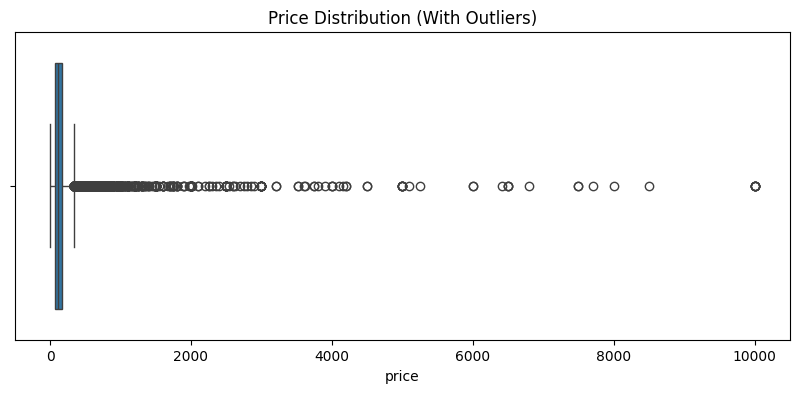

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot price distribution
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title("Price Distribution (With Outliers)")
plt.show()


In [7]:
df = df[df['price'] <= 1000]


In [8]:
# Remove listings with invalid coordinates
df = df[(df['latitude'].between(40.0, 41.0)) & (df['longitude'].between(-75, -73))]


In [9]:
print("Shape after cleaning:", df.shape)
print("Missing values:", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())


Shape after cleaning: (48619, 16)
Missing values: id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9905
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64
Duplicates: 0


In [10]:
cleaned_path = r"C:\Users\Hi\OneDrive\Desktop\DATA ANALYTICS PROJECTS\Cleaning Data_New York City Airbnb\AB_NYC_2019_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
